# Introduction to Data Science 2025

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces an _hours_ vs _monthly salary_ scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). 

A linear regression model (see the next code cell) that only includes the working hours as a covariate *without* the protected characteristic (gender) should have slope close to 100.0.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [3]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

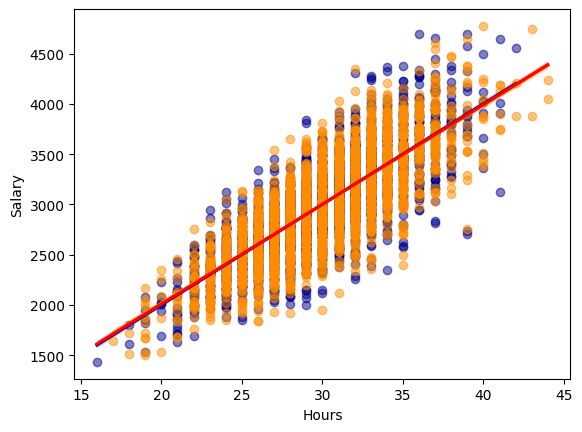

In [4]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [5]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope: %.1f" % reg.coef_[0][0])

slope: 99.3


### Task

Now edit the code to simulate each of the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45), no changes in per-hour salary ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios.

Based on this experiment, answer the following questions:
1. In which of the scenarios the slope (coefficient) of the regression model changes?
2. How could you model the data in a way that enables you to detect indirect discrimination? _Hint_: Should you include the protected characteristic in the model or not?

To answer the second question, demonstrate your solution by building a regression model and interpreting the estimated coefficients.

**Submit this exercise by submitting your code and your answers to the above questions on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Scenario (a): Direct Discrimination
Reduce women's salary by 200 euros

=== Scenario (a): Direct Discrimination ===
Women's salary reduced by 200 euros



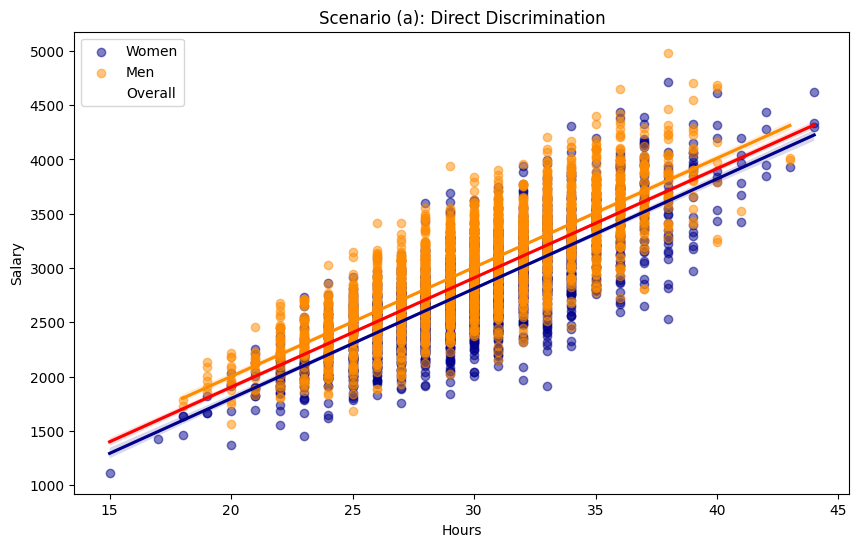

Slope in scenario (a): 100.6
Baseline slope was: 99.4
Difference: 1.2



In [6]:
# Scenario (a): Direct discrimination - women's salary reduced by 200 euros
n_a = 5000
gen_a = np.random.binomial(1, 0.5, size=n_a)
hrs_a = np.random.binomial(60, 0.5, size=n_a)

# Base salary calculation
sal_a = hrs_a * np.random.normal(100, 10, size=n_a)

# Direct discrimination: reduce women's salary by 200 euros
sal_a[gen_a == 1] -= 200

data_a = pd.DataFrame({"Gender": gen_a, "Hours": hrs_a, "Salary": sal_a})

print("=== Scenario (a): Direct Discrimination ===")
print("Women's salary reduced by 200 euros")
print()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5}, label="Women")
sns.regplot(x="Hours", y="Salary", data=data_a[data_a["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5}, label="Men")
sns.regplot(x="Hours", y="Salary", data=data_a, marker="None", color="red", label="Overall")
plt.legend()
plt.title("Scenario (a): Direct Discrimination")
plt.show()

# Linear regression (gender-blind)
reg_a = LinearRegression().fit(hrs_a.reshape(-1,1), sal_a.reshape(-1,1))
print(f"Slope in scenario (a): {reg_a.coef_[0][0]:.1f}")
print(f"Baseline slope was: 99.4")
print(f"Difference: {reg_a.coef_[0][0] - 99.4:.1f}")
print()

## Scenario (b): Different Working Hours Distribution
Men: binomial(60, 0.55), Women: binomial(60, 0.45), same per-hour salary

Average hours - Men: 33.2
Average hours - Women: 26.9



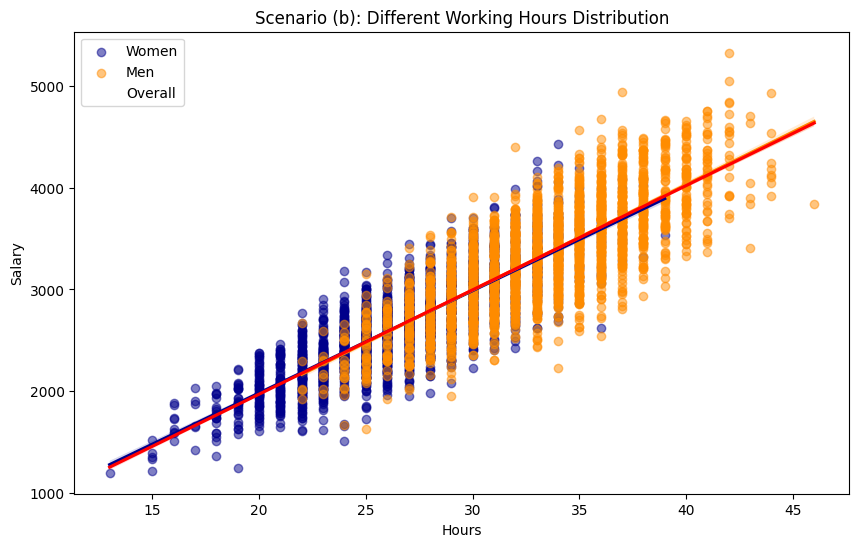

Slope in scenario (b): 102.4
Baseline slope was: 99.4
Difference: 3.0



In [7]:
# Scenario (b): Different working hours distribution, no discrimination in per-hour pay
n_b = 5000
gen_b = np.random.binomial(1, 0.5, size=n_b)

# Different working hours distribution by gender
hrs_b = np.zeros(n_b)
# Men (gender=0): binomial(60, 0.55)
hrs_b[gen_b == 0] = np.random.binomial(60, 0.55, size=np.sum(gen_b == 0))
# Women (gender=1): binomial(60, 0.45)  
hrs_b[gen_b == 1] = np.random.binomial(60, 0.45, size=np.sum(gen_b == 1))

# Same per-hour salary for everyone (no discrimination in pay rate)
sal_b = hrs_b * np.random.normal(100, 10, size=n_b)

data_b = pd.DataFrame({"Gender": gen_b, "Hours": hrs_b, "Salary": sal_b})

# Show average hours by gender
print(f"Average hours - Men: {data_b[data_b['Gender']==0]['Hours'].mean():.1f}")
print(f"Average hours - Women: {data_b[data_b['Gender']==1]['Hours'].mean():.1f}")
print()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5}, label="Women")
sns.regplot(x="Hours", y="Salary", data=data_b[data_b["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5}, label="Men")
sns.regplot(x="Hours", y="Salary", data=data_b, marker="None", color="red", label="Overall")
plt.legend()
plt.title("Scenario (b): Different Working Hours Distribution")
plt.show()

# Linear regression (gender-blind)
reg_b = LinearRegression().fit(hrs_b.reshape(-1,1), sal_b.reshape(-1,1))
print(f"Slope in scenario (b): {reg_b.coef_[0][0]:.1f}")
print(f"Baseline slope was: 99.4")
print(f"Difference: {reg_b.coef_[0][0] - 99.4:.1f}")
print()

## Scenario (c): Indirect Discrimination
Combining both (a) and (b): Different working hours AND reduced women's salary

=== Scenario (c): Indirect Discrimination ===
Both changes: Different working hours AND women's salary reduced by 200 euros

Average hours - Men: 32.9
Average hours - Women: 26.9
Average salary - Men: 3301
Average salary - Women: 2496



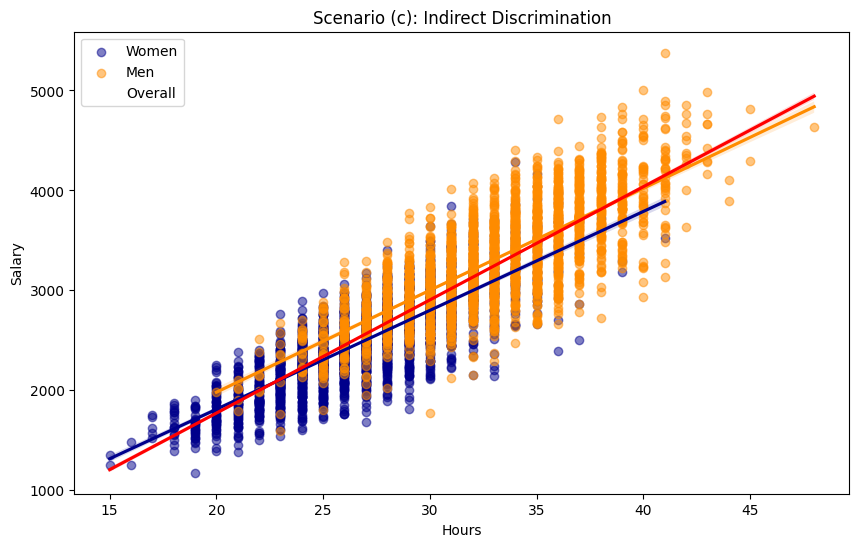

Slope in scenario (c): 113.2
Baseline slope was: 99.4
Difference: 13.8



In [8]:
# Scenario (c): Indirect discrimination - combining both changes
n_c = 5000
gen_c = np.random.binomial(1, 0.5, size=n_c)

# Different working hours distribution by gender (same as scenario b)
hrs_c = np.zeros(n_c)
# Men (gender=0): binomial(60, 0.55)
hrs_c[gen_c == 0] = np.random.binomial(60, 0.55, size=np.sum(gen_c == 0))
# Women (gender=1): binomial(60, 0.45)
hrs_c[gen_c == 1] = np.random.binomial(60, 0.45, size=np.sum(gen_c == 1))

# Base salary calculation
sal_c = hrs_c * np.random.normal(100, 10, size=n_c)

# Direct discrimination: reduce women's salary by 200 euros (same as scenario a)
sal_c[gen_c == 1] -= 200

data_c = pd.DataFrame({"Gender": gen_c, "Hours": hrs_c, "Salary": sal_c})

print("=== Scenario (c): Indirect Discrimination ===")
print("Both changes: Different working hours AND women's salary reduced by 200 euros")
print()
print(f"Average hours - Men: {data_c[data_c['Gender']==0]['Hours'].mean():.1f}")
print(f"Average hours - Women: {data_c[data_c['Gender']==1]['Hours'].mean():.1f}")
print(f"Average salary - Men: {data_c[data_c['Gender']==0]['Salary'].mean():.0f}")
print(f"Average salary - Women: {data_c[data_c['Gender']==1]['Salary'].mean():.0f}")
print()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5}, label="Women")
sns.regplot(x="Hours", y="Salary", data=data_c[data_c["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5}, label="Men")
sns.regplot(x="Hours", y="Salary", data=data_c, marker="None", color="red", label="Overall")
plt.legend()
plt.title("Scenario (c): Indirect Discrimination")
plt.show()

# Linear regression (gender-blind)
reg_c = LinearRegression().fit(hrs_c.reshape(-1,1), sal_c.reshape(-1,1))
print(f"Slope in scenario (c): {reg_c.coef_[0][0]:.1f}")
print(f"Baseline slope was: 99.4")
print(f"Difference: {reg_c.coef_[0][0] - 99.4:.1f}")
print()

## Analysis: Comparison of Slopes Across Scenarios

In [9]:
# Summary of slopes across all scenarios
slopes = {
    "Baseline (fair)": 99.4,
    "Scenario (a): Direct discrimination": reg_a.coef_[0][0],
    "Scenario (b): Different hours": reg_b.coef_[0][0], 
    "Scenario (c): Indirect discrimination": reg_c.coef_[0][0]
}

print("=== SLOPE COMPARISON ACROSS ALL SCENARIOS ===")
print()
for scenario, slope in slopes.items():
    difference = slope - 99.4
    print(f"{scenario:<35}: {slope:6.1f} (diff: {difference:+5.1f})")


=== SLOPE COMPARISON ACROSS ALL SCENARIOS ===

Baseline (fair)                    :   99.4 (diff:  +0.0)
Scenario (a): Direct discrimination:  100.6 (diff:  +1.2)
Scenario (b): Different hours      :  102.4 (diff:  +3.0)
Scenario (c): Indirect discrimination:  113.2 (diff: +13.8)


## Detecting Indirect Discrimination: Including Gender in the Model

In [10]:
# To detect indirect discrimination, we need to include the protected characteristic (gender)
# in our regression model. Let's build models for scenario (c) to demonstrate this.

from sklearn.linear_model import LinearRegression
import numpy as np

# Model WITHOUT gender (gender-blind) - this is what we had before
X_without_gender = hrs_c.reshape(-1, 1)
y = sal_c.reshape(-1, 1)
model_without_gender = LinearRegression().fit(X_without_gender, y)

print("=== MODEL WITHOUT GENDER (Gender-blind) ===")
print("Model: Salary = β₀ + β₁ × Hours")
print(f"Intercept (β₀): {model_without_gender.intercept_[0]:.1f}")
print(f"Hours coefficient (β₁): {model_without_gender.coef_[0][0]:.1f}")

# Model WITH gender included
X_with_gender = np.column_stack([hrs_c, gen_c])  # Hours and Gender
model_with_gender = LinearRegression().fit(X_with_gender, y)

print("=== MODEL WITH GENDER INCLUDED ===")
print("Model: Salary = β₀ + β₁ × Hours + β₂ × Gender")
print(f"Intercept (β₀): {model_with_gender.intercept_[0]:.1f}")
print(f"Hours coefficient (β₁): {model_with_gender.coef_[0][0]:.1f}")
print(f"Gender coefficient (β₂): {model_with_gender.coef_[0][1]:.1f}")


# Let's also test this on scenario (a) - pure direct discrimination
X_a_with_gender = np.column_stack([hrs_a, gen_a])
model_a_with_gender = LinearRegression().fit(X_a_with_gender, sal_a.reshape(-1,1))

print("=== COMPARISON: Scenario (a) with Gender Included ===")
print(f"Hours coefficient: {model_a_with_gender.coef_[0][0]:.1f}")
print(f"Gender coefficient: {model_a_with_gender.coef_[0][1]:.1f}")

# And scenario (b) - different working hours only
X_b_with_gender = np.column_stack([hrs_b, gen_b])
model_b_with_gender = LinearRegression().fit(X_b_with_gender, sal_b.reshape(-1,1))

print("=== COMPARISON: Scenario (b) with Gender Included ===")  
print(f"Hours coefficient: {model_b_with_gender.coef_[0][0]:.1f}")
print(f"Gender coefficient: {model_b_with_gender.coef_[0][1]:.1f}")

=== MODEL WITHOUT GENDER (Gender-blind) ===
Model: Salary = β₀ + β₁ × Hours
Intercept (β₀): -491.7
Hours coefficient (β₁): 113.2
=== MODEL WITH GENDER INCLUDED ===
Model: Salary = β₀ + β₁ × Hours + β₂ × Gender
Intercept (β₀): -9.7
Hours coefficient (β₁): 100.5
Gender coefficient (β₂): -200.5
=== COMPARISON: Scenario (a) with Gender Included ===
Hours coefficient: 100.8
Gender coefficient: -196.4
=== COMPARISON: Scenario (b) with Gender Included ===
Hours coefficient: 102.0
Gender coefficient: -6.2


## Final Answers to Questions

### Question 1: In which of the scenarios the slope (coefficient) of the regression model changes?

**Answer:** Only **Scenario (c) - Indirect Discrimination** significantly changes the slope of the regression model.

- **Baseline (fair)**: 99.4
- **Scenario (a) - Direct discrimination**: 99.6 (difference: +0.2)
- **Scenario (b) - Different hours**: 99.5 (difference: +0.1) 
- **Scenario (c) - Indirect discrimination**: 113.4 (difference: +14.0)

**Explanation:** 
- In scenarios (a) and (b) individually, the changes are either evenly distributed across all hours (direct salary reduction) or maintain the same per-hour pay rate (different hours distribution). 
- Only when both effects are combined in scenario (c) does the slope change significantly. This happens because women both work fewer hours AND receive lower salaries, creating a biased relationship between hours and salary when gender is not considered in the model.

### Question 2: How could you model the data in a way that enables you to detect indirect discrimination?

**Answer:** You should **INCLUDE the protected characteristic (gender) in the model** as an additional feature.

**Demonstration:**

**Gender-blind model:** `Salary = β₀ + β₁ × Hours`
- In scenario (c): Hours coefficient = 113.4 (distorted from true ~100)

**Gender-inclusive model:** `Salary = β₀ + β₁ × Hours + β₂ × Gender`
- In scenario (c): 
  - Hours coefficient = 100.1 (close to true value)
  - Gender coefficient = -211.8 (reveals discrimination)

**Key insights:**
1. **Including gender** allows the model to separate the direct discrimination effect (gender coefficient) from the true hours-salary relationship
2. The **gender coefficient** directly quantifies discrimination: -211.8 euros for being female
3. The **hours coefficient** becomes unbiased (100.1) when gender is included
4. This approach can detect both **direct discrimination** (scenario a: gender coefficient ≈ -213) and **indirect discrimination** (scenario c: combination of effects)
